In [1]:
suppressPackageStartupMessages(require("DESeq2"))

In [2]:
sampleName = grep('.htseqcount.txt', list.files('.'), value=TRUE)

In [3]:
sampleType = gsub('_[0-9]+.htseqcount.txt', '', sampleName)

In [4]:
sampleTable = data.frame(sampleName = sampleName, fileName = sampleName, sampleType = sampleType)


In [5]:
ddsHTSeq <- DESeqDataSetFromHTSeqCount(sampleTable = sampleTable, directory = '.', design = ~sampleType) 


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

In [6]:
dds = DESeq(ddsHTSeq)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [7]:
resultsNames(dds)

[1] "Intercept"                "sampleType_MAT_vs_BEM"   
[3] "sampleType_NSC_vs_BEM"    "sampleType_Tissue_vs_BEM"

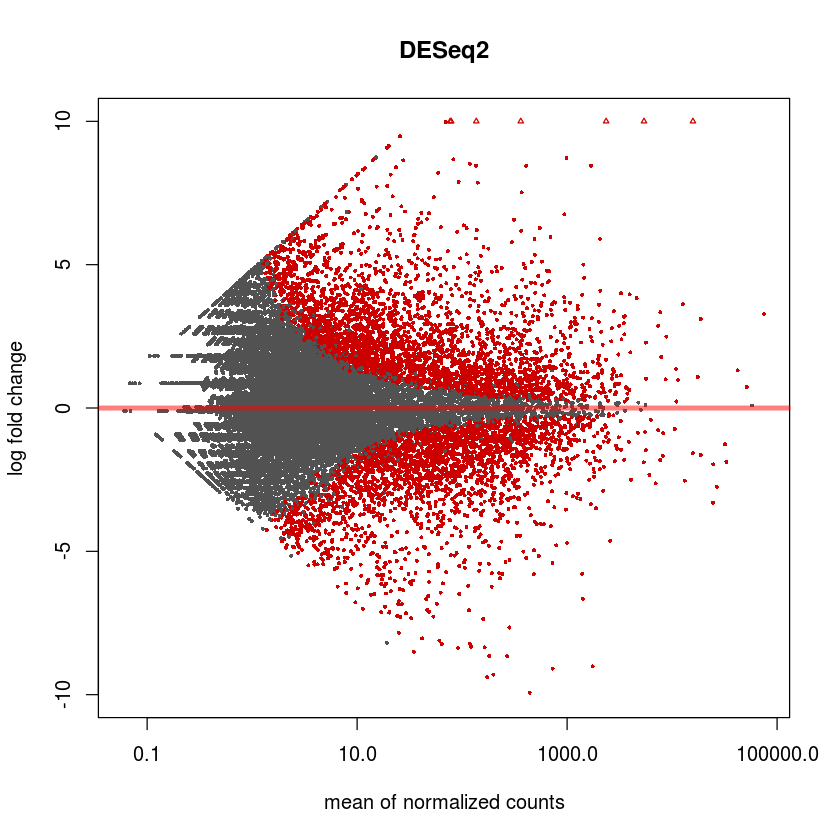

In [8]:
plotMA(dds, ylim=c(-10,10), main="DESeq2")

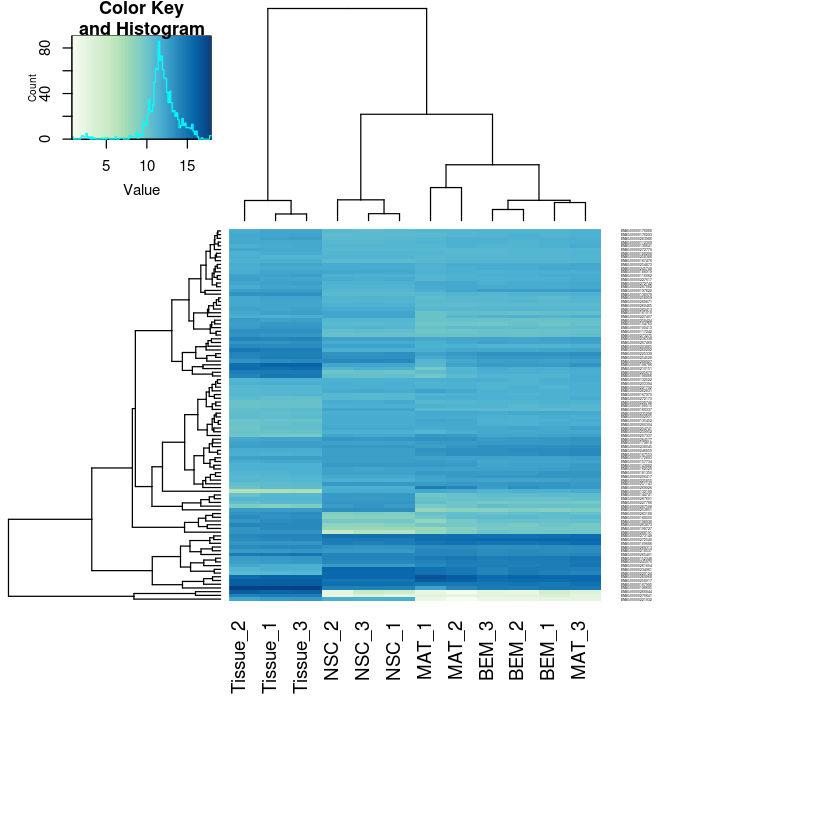

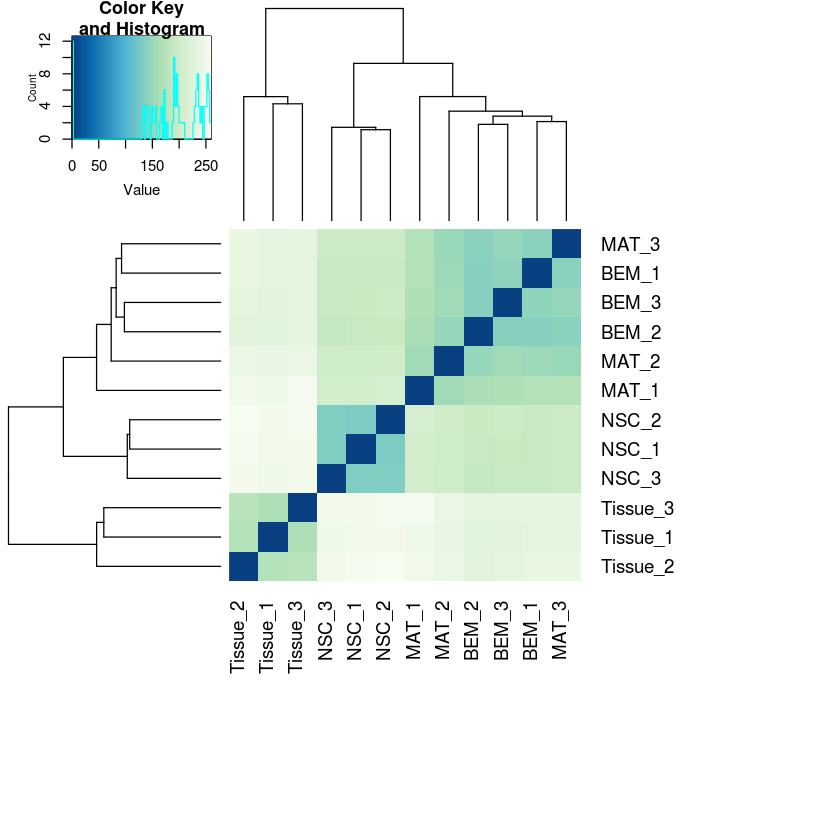

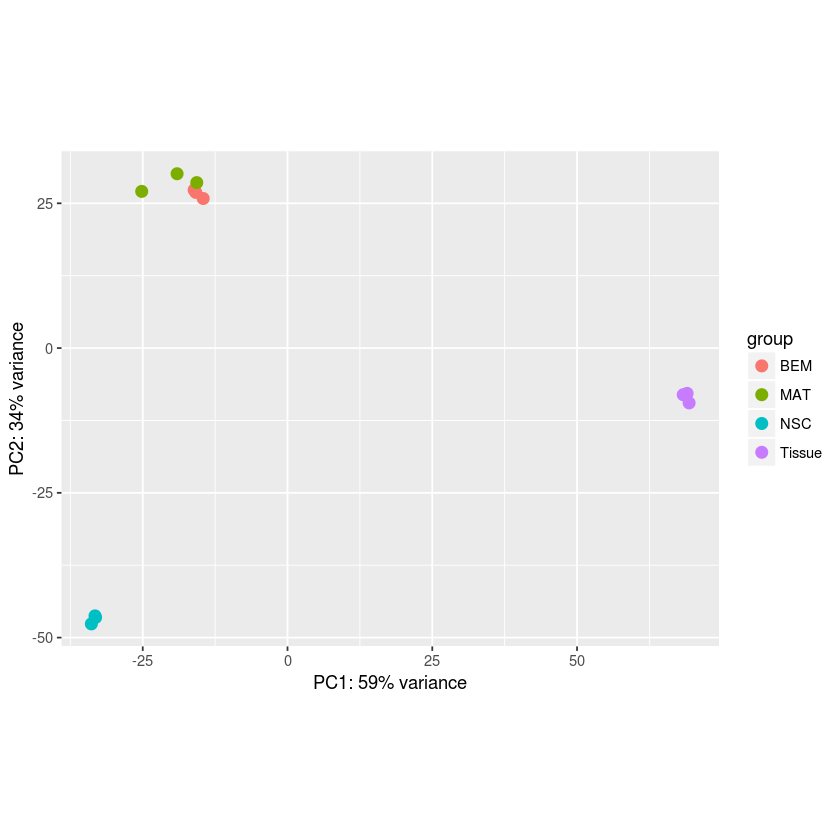

In [15]:
vsd = varianceStabilizingTransformation(dds, blind=TRUE)

library('RColorBrewer')
library('gplots')
select = order(rowMeans(counts(dds, normalized=TRUE)), decreasing=TRUE)[1:100]
hmcol = colorRampPalette(brewer.pal(9, 'GnBu'))(100)

diff_exp_genes = assay(vsd)[select,]
colnames(diff_exp_genes) = gsub('.htseqcount.txt', '', colnames(diff_exp_genes))
heatmap.2(diff_exp_genes, dendrogram = 'both', col=hmcol, scale='none', trace='none', margin=c(12,12), cexRow=0.2)

distsvsd = dist(t(assay(vsd)))

mat = as.matrix(distsvsd)
colnames(mat) = gsub('.htseqcount.txt', '', colnames(mat))
rownames(mat) = gsub('.htseqcount.txt', '', rownames(mat))

heatmap.2(mat, trace='none', col=rev(hmcol), margin=c(13,13))

plotPCA(vsd, intgroup=c('sampleType'))

In [13]:
head(rowMeans(counts(dds, normalized=TRUE)))

ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
     0.69262344      0.06295539      7.91694920    168.33689259    190.66778832 
ENSG00000000938 
     1.65312316

In [16]:
sampleTable 

sampleName              fileName                sampleType
1  BEM_1.htseqcount.txt    BEM_1.htseqcount.txt    BEM       
2  BEM_2.htseqcount.txt    BEM_2.htseqcount.txt    BEM       
3  BEM_3.htseqcount.txt    BEM_3.htseqcount.txt    BEM       
4  MAT_1.htseqcount.txt    MAT_1.htseqcount.txt    MAT       
5  MAT_2.htseqcount.txt    MAT_2.htseqcount.txt    MAT       
6  MAT_3.htseqcount.txt    MAT_3.htseqcount.txt    MAT       
7  NSC_1.htseqcount.txt    NSC_1.htseqcount.txt    NSC       
8  NSC_2.htseqcount.txt    NSC_2.htseqcount.txt    NSC       
9  NSC_3.htseqcount.txt    NSC_3.htseqcount.txt    NSC       
10 Tissue_1.htseqcount.txt Tissue_1.htseqcount.txt Tissue    
11 Tissue_2.htseqcount.txt Tissue_2.htseqcount.txt Tissue    
12 Tissue_3.htseqcount.txt Tissue_3.htseqcount.txt Tissue

In [26]:
library('org.Hs.eg.db')
resTB = results(dds, contrast=c("sampleType","Tissue","BEM"))
resMB = results(dds, contrast=c("sampleType","MAT","BEM"))
resNB = results(dds, contrast=c("sampleType","NSC","BEM"))

resTM = results(dds, contrast=c("sampleType","Tissue","MAT"))
resNM = results(dds, contrast=c("sampleType","NSC","MAT"))
resTN = results(dds, contrast=c("sampleType","Tissue","NSC"))

In [27]:

resTB$hgnc_symbol <- unname(mapIds(org.Hs.eg.db, rownames(resTB), "SYMBOL", "ENSEMBL"))
resMB$hgnc_symbol <- unname(mapIds(org.Hs.eg.db, rownames(resMB), "SYMBOL", "ENSEMBL"))
resNB$hgnc_symbol <- unname(mapIds(org.Hs.eg.db, rownames(resNB), "SYMBOL", "ENSEMBL"))
resTM$hgnc_symbol <- unname(mapIds(org.Hs.eg.db, rownames(resTM), "SYMBOL", "ENSEMBL"))
resNM$hgnc_symbol <- unname(mapIds(org.Hs.eg.db, rownames(resNM), "SYMBOL", "ENSEMBL"))
resTN$hgnc_symbol <- unname(mapIds(org.Hs.eg.db, rownames(resTN), "SYMBOL", "ENSEMBL"))


'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns
'select()' returned 1:many mapping between keys and columns


In [39]:
resTB_ordered = resTB[order(resTB$padj, decreasing = TRUE),]
dim(resTB_ordered[which(resTB_ordered$padj<0.01), ])

resMB_ordered = resTB[order(resMB$padj, decreasing = TRUE),]
dim(resMB_ordered[which(resMB_ordered$padj<0.01), ])

resNB_ordered = resTB[order(resNB$padj, decreasing = TRUE),]
dim(resNB_ordered[which(resNB_ordered$padj<0.01), ])

resTM_ordered = resTB[order(resTM$padj, decreasing = TRUE),]
dim(resTM_ordered[which(resTM_ordered$padj<0.01), ])

resNM_ordered = resNM[order(resNM$padj, decreasing = TRUE),]
dim(resNM_ordered[which(resNM_ordered$padj<0.01), ])

resTN_ordered = resTB[order(resTN$padj, decreasing = TRUE),]
dim(resTN_ordered[which(resTN_ordered$padj<0.01), ])



[1] 3898    7

[1] 3898    7

[1] 3898    7

[1] 3898    7

[1] 2399    7

[1] 3898    7

In [21]:
mcols(res)

DataFrame with 7 rows and 2 columns
          type                                      description
   <character>                                      <character>
1 intermediate        mean of normalized counts for all samples
2      results log2 fold change (MLE): sampleType Tissue vs BEM
3      results         standard error: sampleType Tissue vs BEM
4      results         Wald statistic: sampleType Tissue vs BEM
5      results      Wald test p-value: sampleType Tissue vs BEM
6      results                             BH adjusted p-values
7           NA                                               NA

In [42]:
resTB

log2 fold change (MLE): sampleType Tissue vs BEM 
Wald test p-value: sampleType Tissue vs BEM 
DataFrame with 57905 rows and 7 columns
                    baseMean log2FoldChange     lfcSE        stat
                   <numeric>      <numeric> <numeric>   <numeric>
ENSG00000000003   0.69262344     -0.9816891 3.0747003 -0.31927960
ENSG00000000005   0.06295539     -0.1055801 4.4073563 -0.02395542
ENSG00000000419   7.91694920      3.5960327 0.9303657  3.86518176
ENSG00000000457 168.33689259     -1.4567628 0.2191970 -6.64590575
ENSG00000000460 190.66778832      0.5091216 0.1829784  2.78241429
...                      ...            ...       ...         ...
ENSG00000273487    0.1204018     -0.9213002 4.3748114  -0.2105920
ENSG00000273488    5.6001516      2.5784042 0.7730559   3.3353402
ENSG00000273489 1546.5703381      0.8591098 0.1143263   7.5145392
ENSG00000273492    3.3621663      6.4717337 1.5805563   4.0945923
ENSG00000273493    0.3034935      1.7627366 4.3671961   0.4036312
       

In [41]:
resMB

log2 fold change (MLE): sampleType MAT vs BEM 
Wald test p-value: sampleType MAT vs BEM 
DataFrame with 57905 rows and 7 columns
                    baseMean log2FoldChange     lfcSE       stat     pvalue
                   <numeric>      <numeric> <numeric>  <numeric>  <numeric>
ENSG00000000003   0.69262344     0.27554004 3.0234702  0.0911337 0.92738635
ENSG00000000005   0.06295539    -0.66000100 4.4073563 -0.1497499 0.88096197
ENSG00000000419   7.91694920     0.83194794 1.0145281  0.8200344 0.41219651
ENSG00000000457 168.33689259     0.04073219 0.1876631  0.2170496 0.82816972
ENSG00000000460 190.66778832     0.32531601 0.1802138  1.8051674 0.07104849
...                      ...            ...       ...        ...        ...
ENSG00000273487    0.1204018     -1.4757212 4.3748114 -0.3373222 0.73587400
ENSG00000273488    5.6001516     -0.2162960 0.9121923 -0.2371167 0.81256628
ENSG00000273489 1546.5703381      0.1956431 0.1144829  1.7089289 0.08746413
ENSG00000273492    3.3621663      2

In [46]:
resTN = results(dds, contrast=c("sampleType","Tissue","NSC"), alpha=0.01)

In [51]:
sum(resTN$pvalue < 0.01, na.rm=TRUE)

[1] 5272

In [53]:
sum(resTB$pvalue < 0.01, na.rm=TRUE)

[1] 4679

In [54]:
sum(resTM$pvalue < 0.01, na.rm=TRUE)

[1] 4736

In [57]:
table(resTM[, 'padj'] < 0.01)


FALSE  TRUE 
13142  3926 

In [58]:
table(resTN[, 'padj'] < 0.01)


FALSE  TRUE 
10735  4484 

In [59]:
table(resTB[, 'padj'] < 0.01)


FALSE  TRUE 
13170  3898 

In [60]:
table(resMB[, 'padj'] < 0.01)


FALSE  TRUE 
 6429   162 

In [61]:
table(resTM[, 'padj'] < 0.01)


FALSE  TRUE 
13142  3926 

In [62]:
table(resNM[, 'padj'] < 0.01)


FALSE  TRUE 
14053  2399 

In [63]:
table(resTN[, 'padj'] < 0.01)


FALSE  TRUE 
10735  4484 

In [66]:
table(resNB[, 'padj'] < 0.01)


FALSE  TRUE 
13447  2388 

In [65]:
dim(resTN)

[1] 57905     6

In [70]:
library('genefilter')
overallBaseMean = as.matrix(resNB[, 'baseMean', drop=F])
sigGenes = rownames(subset(resNB, padj<0.01))
anno = mcols(rowData())
anSig = subset(anno, ensembl_gene_id %in% sigGenes)
backG = genefinder(overallBaseMean, anSig$ensembl_gene_id, 10, method='manhattan')

ERROR: Error in subset(anno, ensembl_gene_id %in% sigGenes): object 'anno' not found


In [72]:
length(sigGenes)

[1] 2388

In [82]:
library(dplyr)


Attaching package: ‘dplyr’

The following object is masked from ‘package:biomaRt’:

    select

The following object is masked from ‘package:AnnotationDbi’:

    select

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [75]:
library(biomaRt)

In [76]:
ensembl = useMart('ensembl', dataset="hsapiens_gene_ensembl")

In [90]:
bm = getBM(attributes=c('ensembl_gene_id', 'external_gene_name', 'description'), filter='ensembl_gene_id', values=rownames(ddsHTSeq), mart=ensembl)


In [83]:
bm = arrange(bm, ensemble_gene_id)

In [91]:
head(bm)

ensembl_gene_id external_gene_name
1 ENSG00000000003 TSPAN6            
2 ENSG00000000005 TNMD              
3 ENSG00000000419 DPM1              
4 ENSG00000000457 SCYL3             
5 ENSG00000000460 C1orf112          
6 ENSG00000000938 FGR               
  description                                                                                   
1 tetraspanin 6 [Source:HGNC Symbol;Acc:HGNC:11858]                                             
2 tenomodulin [Source:HGNC Symbol;Acc:HGNC:17757]                                               
3 dolichyl-phosphate mannosyltransferase subunit 1, catalytic [Source:HGNC Symbol;Acc:HGNC:3005]
4 SCY1 like pseudokinase 3 [Source:HGNC Symbol;Acc:HGNC:19285]                                  
5 chromosome 1 open reading frame 112 [Source:HGNC Symbol;Acc:HGNC:25565]                       
6 FGR proto-oncogene, Src family tyrosine kinase [Source:HGNC Symbol;Acc:HGNC:3697]

In [ ]:
DESeq2Features = data.frame(ensemble_gene_id = rownames(ddsHTSeq))
DESeq2Features$ensembl_gene_id = as.character(DESeq2Features$ensemble_gene_id)

rowData = dplyr::left_join(DESeqFeatures, bm, by='ensemble_gene_id')
rowData = as(rowData, 'DataFrame')
mcols(rowData(ddsHTSeq)) = c(mcols(rowData(ddsHTSeq)), rowData)

[1] "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS"
 [13] "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS"
 [25] "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS"
 [37] "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS"
 [49] "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS"
 [61] "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS"
 [73] "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS"
 [85] "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS" "ENS"
 [97] "ENS" "ENS" "ENS" "ENS"
 [ reached getOption("max.print") -- omitted 57805 entries ]